In [1]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
database = "database.sqlite"
conn = sqlite3.connect(database)

In [4]:
tables = pd.read_sql("""select * from sqlite_master""",conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,index,sqlite_autoindex_Player_1,Player,15,None
4,index,sqlite_autoindex_Player_2,Player,17,None
5,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
6,index,sqlite_autoindex_Match_1,Match,19,None
7,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
8,index,sqlite_autoindex_League_1,League,25,None
9,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...


In [5]:
Teams= pd.read_sql("""select * from Team order by team_long_name""",conn)
Teams

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,16848,8350,29.0,1. FC Kaiserslautern,KAI
1,15624,8722,31.0,1. FC Köln,FCK
2,16239,8165,171.0,1. FC Nürnberg,NUR
3,16243,9905,169.0,1. FSV Mainz 05,MAI
4,11817,8576,614.0,AC Ajaccio,AJA
5,11074,108893,111989.0,AC Arles-Avignon,ARL
6,49116,6493,1714.0,AC Bellinzona,BEL
7,26560,10217,650.0,ADO Den Haag,HAA
8,9537,8583,57.0,AJ Auxerre,AUX
9,9547,9829,69.0,AS Monaco,MON


In [6]:
Teams[Teams['team_fifa_api_id']==9979]

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name


In [7]:
Country= pd.read_sql("""select * from Country""",conn)
Country.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [8]:
League= pd.read_sql("""select * from League""",conn)
League.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [9]:
Player= pd.read_sql("""select * from Player""",conn)
Player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [10]:
### Player with Max height in the database
Player[Player['height']==Player['height'].max()]

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
5901,5908,148325,Kristof van Hout,185306,1987-02-09 00:00:00,208.28,243


In [11]:
Match= pd.read_sql("""select * from Match""",conn)
Match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


## Inner Join

In [12]:
match_country = pd.read_sql("""select * from Match 
join Country
on Match.country_id=Country.id
limit 5""",conn)
match_country

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,id,name
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20,1,Belgium
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60,1,Belgium
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75,1,Belgium
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50,1,Belgium
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67,1,Belgium


## Left Join

In [13]:
pd.read_sql("""select * from Match 
left join Team
on Match.away_team_api_id=Team.team_api_id""",conn)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,GBD,GBA,BSH,BSD,BSA,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,3.25,4.00,1.73,3.40,4.20,2,9993,675.0,Beerschot AC,BAC
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.25,3.75,1.91,3.25,3.60,4,9994,2007.0,Sporting Lokeren,LOK
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,3.20,2.50,2.30,3.20,2.75,6,8635,229.0,RSC Anderlecht,AND
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,3.75,5.50,1.44,3.75,6.50,8,9998,1747.0,RAEC Mons,MON
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,3.50,1.65,4.75,3.30,1.67,10,9985,232.0,Standard de Liège,STL
5,6,1,1,2008/2009,1,2008-09-24 00:00:00,492478,8203,8342,1,...,3.40,1.70,NaN,NaN,NaN,12,8342,231.0,Club Brugge KV,CLB
6,7,1,1,2008/2009,1,2008-08-16 00:00:00,492479,9999,8571,2,...,3.25,3.75,2.10,3.25,3.10,14,8571,100081.0,KV Kortrijk,KOR
7,8,1,1,2008/2009,1,2008-08-16 00:00:00,492480,4049,9996,1,...,3.20,2.25,2.88,3.25,2.20,16,9996,111560.0,Royal Excel Mouscron,MOU
8,9,1,1,2008/2009,1,2008-08-16 00:00:00,492481,10001,9986,1,...,3.30,2.80,2.25,3.20,2.80,18,9986,670.0,Sporting Charleroi,CHA
9,10,1,1,2008/2009,10,2008-11-01 00:00:00,492564,8342,8571,4,...,5.00,10.00,1.29,4.50,9.00,14,8571,100081.0,KV Kortrijk,KOR


## Mixed Join

In [14]:
mixed_join = pd.read_sql("""SELECT Match.id, 
                                        Country.name AS country_name, 
                                        League.name AS league_name, 
                                        season, 
                                        stage, 
                                        date,
                                        HT.team_long_name AS  home_team,
                                        AT.team_long_name AS away_team,
                                        home_team_goal, 
                                        away_team_goal                                        
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                WHERE country_name = 'England'
                                ORDER by date""", conn)
mixed_join

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal
0,1730,England,England Premier League,2008/2009,1,2008-08-16 00:00:00,Arsenal,West Bromwich Albion,1,0
1,1731,England,England Premier League,2008/2009,1,2008-08-16 00:00:00,Sunderland,Liverpool,0,1
2,1732,England,England Premier League,2008/2009,1,2008-08-16 00:00:00,West Ham United,Wigan Athletic,2,1
3,1734,England,England Premier League,2008/2009,1,2008-08-16 00:00:00,Everton,Blackburn Rovers,2,3
4,1735,England,England Premier League,2008/2009,1,2008-08-16 00:00:00,Middlesbrough,Tottenham Hotspur,2,1
5,1736,England,England Premier League,2008/2009,1,2008-08-16 00:00:00,Bolton Wanderers,Stoke City,3,1
6,1737,England,England Premier League,2008/2009,1,2008-08-16 00:00:00,Hull City,Fulham,2,1
7,1729,England,England Premier League,2008/2009,1,2008-08-17 00:00:00,Manchester United,Newcastle United,1,1
8,1733,England,England Premier League,2008/2009,1,2008-08-17 00:00:00,Aston Villa,Manchester City,4,2
9,1738,England,England Premier League,2008/2009,1,2008-08-17 00:00:00,Chelsea,Portsmouth,4,0


### Let's do some analytics on Chelsea FC for season 2015/16 (as chesea is my fav team :) )

In [15]:
chelsea = mixed_join[((mixed_join['home_team']=='Chelsea') | (mixed_join['away_team']=='Chelsea')) & (mixed_join['season']=='2015/2016')]

In [16]:
chelsea_join = pd.read_sql("""SELECT Match.id, 
                                        Country.name AS country_name, 
                                        League.name AS league_name, 
                                        season, 
                                        stage, 
                                        date,
                                        HT.team_long_name AS  home_team,
                                        AT.team_long_name AS away_team,
                                        home_team_goal, 
                                        away_team_goal                                        
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                WHERE (home_team='Chelsea'or away_team = 'Chelsea') and season='2015/2016' 
                                ORDER by date""", conn)
chelsea_join

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal
0,4391,England,England Premier League,2015/2016,1,2015-08-08 00:00:00,Chelsea,Swansea City,2,2
1,4502,England,England Premier League,2015/2016,2,2015-08-16 00:00:00,Manchester City,Chelsea,3,0
2,4617,England,England Premier League,2015/2016,3,2015-08-23 00:00:00,West Bromwich Albion,Chelsea,2,3
3,4711,England,England Premier League,2015/2016,4,2015-08-29 00:00:00,Chelsea,Crystal Palace,1,2
4,4721,England,England Premier League,2015/2016,5,2015-09-12 00:00:00,Everton,Chelsea,3,1
5,4731,England,England Premier League,2015/2016,6,2015-09-19 00:00:00,Chelsea,Arsenal,2,0
6,4742,England,England Premier League,2015/2016,7,2015-09-26 00:00:00,Newcastle United,Chelsea,2,2
7,4752,England,England Premier League,2015/2016,8,2015-10-03 00:00:00,Chelsea,Southampton,1,3
8,4759,England,England Premier League,2015/2016,9,2015-10-17 00:00:00,Chelsea,Aston Villa,2,0
9,4408,England,England Premier League,2015/2016,10,2015-10-24 00:00:00,West Ham United,Chelsea,2,1


In [17]:
club='Chelsea'
chelsea_join['win'] = 0
chelsea_join['lose'] = 0
chelsea_join['tie'] = 0
for index in range(len(chelsea_join)):
    if chelsea_join.loc[index]['home_team'] == club:
        if chelsea_join.loc[index]['home_team_goal'] > chelsea_join.loc[index]['away_team_goal']:
            chelsea_join.loc[index,'win'] = 1           
        elif chelsea_join.loc[index]['home_team_goal'] < chelsea_join.loc[index]['away_team_goal']:
            chelsea_join.loc[index, 'lose'] = 1
        elif chelsea_join.loc[index]['home_team_goal'] == chelsea_join.loc[index]['away_team_goal']:
            chelsea_join.loc[index, 'tie'] = 1
            
    elif chelsea_join.loc[index]['away_team'] == club:
        if chelsea_join.loc[index]['home_team_goal'] < chelsea_join.loc[index]['away_team_goal']:
            chelsea_join.loc[index, 'win'] = 1           
        elif chelsea_join.loc[index]['home_team_goal'] > chelsea_join.loc[index]['away_team_goal']:
            chelsea_join.loc[index, 'lose'] = 1
        elif chelsea_join.loc[index]['home_team_goal'] == chelsea_join.loc[index]['away_team_goal']:
            chelsea_join.loc[index, 'tie'] = 1
        

In [18]:
chelsea_join

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal,win,lose,tie
0,4391,England,England Premier League,2015/2016,1,2015-08-08 00:00:00,Chelsea,Swansea City,2,2,0,0,1
1,4502,England,England Premier League,2015/2016,2,2015-08-16 00:00:00,Manchester City,Chelsea,3,0,0,1,0
2,4617,England,England Premier League,2015/2016,3,2015-08-23 00:00:00,West Bromwich Albion,Chelsea,2,3,1,0,0
3,4711,England,England Premier League,2015/2016,4,2015-08-29 00:00:00,Chelsea,Crystal Palace,1,2,0,1,0
4,4721,England,England Premier League,2015/2016,5,2015-09-12 00:00:00,Everton,Chelsea,3,1,0,1,0
5,4731,England,England Premier League,2015/2016,6,2015-09-19 00:00:00,Chelsea,Arsenal,2,0,1,0,0
6,4742,England,England Premier League,2015/2016,7,2015-09-26 00:00:00,Newcastle United,Chelsea,2,2,0,0,1
7,4752,England,England Premier League,2015/2016,8,2015-10-03 00:00:00,Chelsea,Southampton,1,3,0,1,0
8,4759,England,England Premier League,2015/2016,9,2015-10-17 00:00:00,Chelsea,Aston Villa,2,0,1,0,0
9,4408,England,England Premier League,2015/2016,10,2015-10-24 00:00:00,West Ham United,Chelsea,2,1,0,1,0


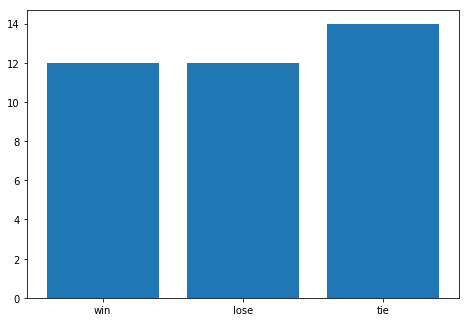

In [19]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x_axis = ['win', 'lose', 'tie']
y_axis = [chelsea_join['win'].sum(),chelsea_join['lose'].sum(),chelsea_join['tie'].sum()]
ax.bar(x_axis,y_axis)
plt.show()

In [20]:
# Points earned by Chelsea in season 2015-16 are calculated as below

points = chelsea_join['win'].sum()*3+chelsea_join['lose'].sum()*0+chelsea_join['tie'].sum()
print(points)

50


In [21]:
leages_by_season = pd.read_sql("""SELECT Country.name AS country_name, 
                                        League.name AS league_name, 
                                        season,
                                        count(distinct stage) AS number_of_stages,
                                        count(distinct HT.team_long_name) AS number_of_teams,
                                        avg(home_team_goal) AS avg_home_team_scors, 
                                        avg(away_team_goal) AS avg_away_team_goals, 
                                        avg(home_team_goal-away_team_goal) AS avg_goal_dif, 
                                        avg(home_team_goal+away_team_goal) AS avg_goals, 
                                        sum(home_team_goal+away_team_goal) AS total_goals                                       
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                WHERE country_name in ('Spain', 'Germany', 'France', 'Italy', 'England')
                                GROUP BY Country.name, League.name, season
                                HAVING count(distinct stage) > 10
                                ORDER BY Country.name, League.name, season DESC
                                ;""", conn)
leages_by_season.head()

,country_name,league_name,season,number_of_stages,number_of_teams,avg_home_team_scors,avg_away_team_goals,avg_goal_dif,avg_goals,total_goals
0,England,England Premier League,2015/2016,38,20,1.492105,1.207895,0.284211,2.700000,1026
1,England,England Premier League,2014/2015,38,20,1.473684,1.092105,0.381579,2.565789,975
2,England,England Premier League,2013/2014,38,20,1.573684,1.194737,0.378947,2.768421,1052
3,England,England Premier League,2012/2013,38,20,1.557895,1.239474,0.318421,2.797368,1063
4,England,England Premier League,2011/2012,38,20,1.589474,1.215789,0.373684,2.805263,1066


In [22]:
germany_avg_goals = leages_by_season[leages_by_season['country_name']=='Germany']['avg_goals']
england_avg_goals = leages_by_season[leages_by_season['country_name']=='England']['avg_goals']
spain_avg_goals = leages_by_season[leages_by_season['country_name']=='Spain']['avg_goals']
france_avg_goals = leages_by_season[leages_by_season['country_name']=='France']['avg_goals']
italy_avg_goals = leages_by_season[leages_by_season['country_name']=='Italy']['avg_goals']
year = leages_by_season[leages_by_season['country_name']=='Germany']['season']

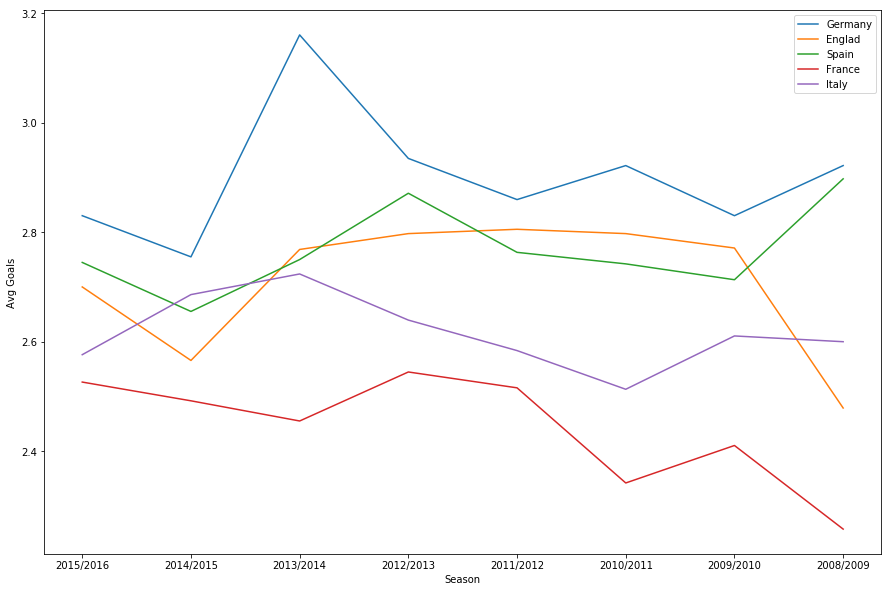

In [23]:
plt.figure(figsize=(15,10))
plt.xlabel("Season")
plt.ylabel("Avg Goals")
plt.plot(year,germany_avg_goals,label='Germany')
plt.plot(year,england_avg_goals,label='Englad')
plt.plot(year,spain_avg_goals,label='Spain')
plt.plot(year,france_avg_goals,label='France')
plt.plot(year,italy_avg_goals,label='Italy')
plt.legend()